<a href="https://colab.research.google.com/github/Tarnished2/DataScientist/blob/main/GetaranGelombang/W1_GetaranTeredam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pramaditya Ardian Saputra
- 50012010161

In [359]:
# import library yang dibutuhkan
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [360]:
# connect colab ke g drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [361]:
# Membuat path untuk mengidentifikasi letak directory
path = '/content/gdrive/MyDrive/datafislab/'
file_name = 'GetaranTeredam.xlsx'
sheet1 = 'udara 0,104'
sheet2 = 'udara 0,166'
sheet3 = 'air 0,104'
sheet4 = 'air 0,166'

# Cek directory
os.listdir(path)

['GetaranTeredam.xlsx']

### Udara

#### 1. 0.104 kg

In [362]:
m1 = 0.104

In [363]:
file_path = os.path.join(path, file_name)
data = pd.read_excel(file_path, sheet_name=sheet1)
data

,Ke-,x0 (m),x1 (m),x2 (m),x3 (m),x4 (m),x5 (m),Waktu
0,1,0.3,0.280,0.268,0.265,0.260,0.258,1.15
1,2,0.3,0.295,0.288,0.280,0.274,0.270,1.11
2,3,0.3,0.272,0.266,0.265,0.270,0.268,1.16
3,Rerata,0.3,0.284,0.274,0.270,0.268,0.265,1.14


In [364]:
# 0. Mengambil nilai x0-x5 dari kolom "Rerata"
x_values = data.loc[data['Ke-'] == 'Rerata', 'x0 (m)': 'x5 (m)'].values[0]

# 1. Menghitung rasio redaman getaran (δ) menggunakan iterasi
δ = []
for i in range(len(x_values) - 1):
    δ_i = (math.log(x_values[i] / x_values[i+1])) / (((4 * ((math.pi) ** 2)) + (math.log(x_values[i] / x_values[i+1]) ** 2))) ** 0.5
    δ.append(δ_i)

# Menampilkan hasil rasio redaman getaran (δ)
for i in range(len(δ)):
    print(f'Hasil δ{i} = {δ[i]}')

Hasil δ0 = 0.00872266990935062
Hasil δ1 = 0.005704996219947407
Hasil δ2 = 0.002340549639914197
Hasil δ3 = 0.0011833127496150703
Hasil δ4 = 0.0017916289122325254


In [365]:
# 2. Menghitung rasio redaman getaran rata-rata (δrata)
δrata1 = sum(δ) / len(δ)
print('δrata =', δrata1)

δrata = 0.003948631486211964


In [366]:
# 3. Menghitung Frekuensi Natural
n = 5 # n adalah banyak getaran
t = data.loc[data['Ke-'] == 'Rerata', 'Waktu'].values[0] # t adalah waktu yang diperlukan sistem untuk n getaran

fn1 = n/t
print('fn = ', fn1)

fn =  4.385964912280702


In [367]:
# 4. Menghitung Frekuensi Sistem Teredam
fd1 = fn1*((1-(δrata1**2))**0.5)
print('fd = ', fd1)

fd =  4.3859307198434445


In [368]:
# 5. Menghitung Konstanta Pegas Sistem
k1 = m1*((2*(math.pi)*fn1)**2)
print('k = ', k1)

k =  78.98113709705243


In [369]:
# 6. Menghitung Koefisien Redaman Kritis
cc1 = (4*m1*k1)**0.5
print('cc = ', cc1)

cc =  5.73202870128664


In [370]:
# 7. Menghitung Koefisien Redaman Aktual
ca1 = cc1*δrata1
print('ca = ', ca1)

ca =  0.0226336690097711


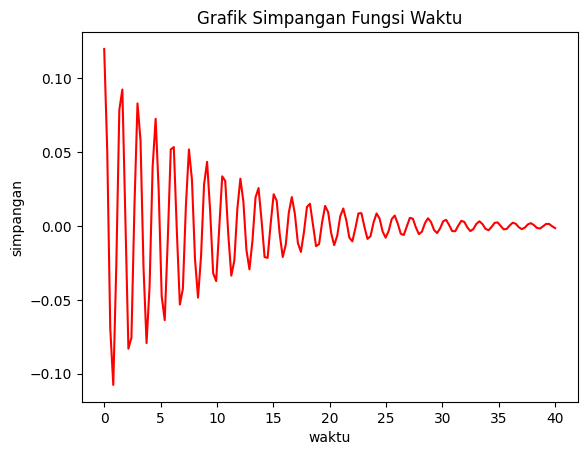

In [371]:
# 8. Membuat Grafik Getaran Teredam
def f(t):
   return x0*((math.e)**(-(δrata1*2*(math.pi)*fn1*t)))*np.cos(2*(math.pi)*fn1*t)

t = np.linspace(0, 40, 150)

plt.plot(t, f(t), color='red')
plt.xlabel('waktu')
plt.ylabel('simpangan')
plt.title('Grafik Simpangan Fungsi Waktu')
plt.show()

#### 2. 0.166 kg

In [372]:
m2 = 0.166

In [373]:
file_path = os.path.join(path, file_name)
data = pd.read_excel(file_path, sheet_name=sheet2)
data

,Ke-,x0 (m),x1 (m),x2 (m),x3 (m),x4 (m),x5 (m),Waktu
0,1,0.34,0.338,0.332,0.330,0.332,0.324,3.25
1,2,0.34,0.340,0.340,0.338,0.336,0.344,3.46
2,3,0.34,0.342,0.346,0.338,0.340,0.346,3.49
3,Rerata,0.34,0.340,0.339,0.335,0.336,0.338,3.40


In [374]:
# Ambil nilai x0-x5 dari kolom yang sesuai
x0 = data.loc[data['Ke-'] == 'Rerata', 'x0 (m)'].values[0]
x1 = data.loc[data['Ke-'] == 'Rerata', 'x1 (m)'].values[0]
x2 = data.loc[data['Ke-'] == 'Rerata', 'x2 (m)'].values[0]
x3 = data.loc[data['Ke-'] == 'Rerata', 'x3 (m)'].values[0]
x4 = data.loc[data['Ke-'] == 'Rerata', 'x4 (m)'].values[0]
x5 = data.loc[data['Ke-'] == 'Rerata', 'x5 (m)'].values[0]

In [375]:
# 0. Mengambil nilai x0-x5 dari kolom "Rerata"
x_values = data.loc[data['Ke-'] == 'Rerata', 'x0 (m)': 'x5 (m)'].values[0]

# 1. Menghitung rasio redaman getaran (δ) menggunakan iterasi
δ = []
for i in range(len(x_values) - 1):
    δ_i = (math.log(x_values[i] / x_values[i+1])) / (((4 * ((math.pi) ** 2)) + (math.log(x_values[i] / x_values[i+1]) ** 2))) ** 0.5
    δ.append(δ_i)

# Menampilkan hasil rasio redaman getaran (δ)
for i in range(len(δ)):
    print(f'Hasil δ{i} = {δ[i]}')

Hasil δ0 = 0.0
Hasil δ1 = 0.0004687924614811126
Hasil δ2 = 0.0018890982512279276
Hasil δ3 = -0.0004743816483264764
Hasil δ4 = -0.0009445420725800583


In [376]:
# 2. Menghitung rasio redaman getaran rata-rata (δrata)
δrata2 = sum(δ) / len(δ)
print('δrata =', δrata2)

δrata = 0.00018779339836050112


In [377]:
# 3. Menghitung Frekuensi Natural
n = 5 # n adalah banyak getaran
t = data.loc[data['Ke-'] == 'Rerata', 'Waktu'].values[0] # t adalah waktu yang diperlukan sistem untuk n getaran

fn2 = n/t
print('fn = ', fn2)

fn =  1.4705882352941178


In [378]:
# 4. Menghitung Frekuensi Sistem Teredam
fd2 = fn2*((1-(δrata2**2))**0.5)
print('fd = ', fd2)

fd =  1.47058820936297


In [379]:
# 5. Menghitung Konstanta Pegas Sistem
k2 = m2*((2*(math.pi)*fn2)**2)
print('k = ', k2)

k =  14.172615316443197


In [380]:
# 6. Menghitung Koefisien Redaman Kritis
cc2 = (4*m2*k2)**0.5
print('cc = ', cc2)

cc =  3.067672826446504


In [381]:
# 7. Menghitung Koefisien Redaman Aktual
ca2 = cc2*δrata2
print('ca = ', ca2)

ca =  0.0005760887051365528


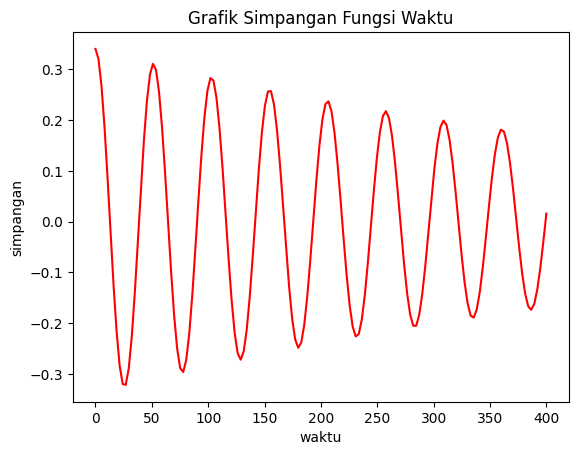

In [382]:
# 8. Membuat Grafik Getaran Teredam
def f(t):
   return x0*((math.e)**(-(δrata2*2*(math.pi)*fn2*t)))*np.cos(2*(math.pi)*fn2*t)

t = np.linspace(0, 400, 150)

plt.plot(t, f(t), color='red')
plt.xlabel('waktu')
plt.ylabel('simpangan')
plt.title('Grafik Simpangan Fungsi Waktu')
plt.show()

In [383]:
# Membuat DataFrame tabel
hasil_perhitungan_udara = pd.DataFrame({
    'δrata': [δrata1, δrata2],
    'fn': [fn1, fn2],
    'fd': [fd1, fd2],
    'k': [k1, k2],
    'cc': [cc1, cc2],
    'ca': [ca1, ca2]
})

# Menampilkan tabel hasil perhitungan
hasil_perhitungan_udara

,δrata,fn,fd,k,cc,ca
0,0.003949,4.385965,4.385931,78.981137,5.732029,0.022634
1,0.000188,1.470588,1.470588,14.172615,3.067673,0.000576


### Air

#### 1. 0.104 kg

In [384]:
file_path = os.path.join(path, file_name)
data = pd.read_excel(file_path, sheet_name=sheet3)
data

,Ke-,x0 (m),x1 (m),x2 (m),x3 (m),x4 (m),x5 (m),Waktu
0,1,0.113,0.091,0.0915,0.090,0.084,0.0820,1.176
1,2,0.113,0.093,0.0925,0.085,0.084,0.0835,1.081
2,3,0.113,0.092,0.0910,0.086,0.083,0.0820,1.044
3,Rerata,0.113,0.092,0.0910,0.087,0.083,0.0820,1.100


In [385]:
# Ambil nilai x0-x5 dari kolom yang sesuai
x0 = data.loc[data['Ke-'] == 'Rerata', 'x0 (m)'].values[0]
x1 = data.loc[data['Ke-'] == 'Rerata', 'x1 (m)'].values[0]
x2 = data.loc[data['Ke-'] == 'Rerata', 'x2 (m)'].values[0]
x3 = data.loc[data['Ke-'] == 'Rerata', 'x3 (m)'].values[0]
x4 = data.loc[data['Ke-'] == 'Rerata', 'x4 (m)'].values[0]
x5 = data.loc[data['Ke-'] == 'Rerata', 'x5 (m)'].values[0]

In [386]:
# 0. Mengambil nilai x0-x5 dari kolom "Rerata"
x_values = data.loc[data['Ke-'] == 'Rerata', 'x0 (m)': 'x5 (m)'].values[0]

# 1. Menghitung rasio redaman getaran (δ) menggunakan iterasi
δ = []
for i in range(len(x_values) - 1):
    δ_i = (math.log(x_values[i] / x_values[i+1])) / (((4 * ((math.pi) ** 2)) + (math.log(x_values[i] / x_values[i+1]) ** 2))) ** 0.5
    δ.append(δ_i)

# Menampilkan hasil rasio redaman getaran (δ)
for i in range(len(δ)):
    print(f'Hasil δ{i} = {δ[i]}')

Hasil δ0 = 0.03270463124273514
Hasil δ1 = 0.0017394129672451267
Hasil δ2 = 0.007154052496218774
Hasil δ3 = 0.00749081683961572
Hasil δ4 = 0.0019291708558138944


In [387]:
# 2. Menghitung rasio redaman getaran rata-rata (δrata)
δrata3 = sum(δ) / len(δ)
print('δrata =', δrata3)

δrata = 0.010203616880325731


In [388]:
# 3. Menghitung Frekuensi Natural
n = 5 # n adalah banyak getaran
t = data.loc[data['Ke-'] == 'Rerata', 'Waktu'].values[0] # t adalah waktu yang diperlukan sistem untuk n getaran

fn3 = n/t
print('fn = ', fn3)

fn =  4.545454545454545


In [389]:
# 4. Menghitung Frekuensi Sistem Teredam
fd3 = fn3*((1-(δrata3**2))**0.5)
print('fd = ', fd3)

fd =  4.5452179170284035


In [390]:
# 5. Menghitung Konstanta Pegas Sistem
k3 = m1*((2*(math.pi)*fn3)**2)
print('k = ', k3)

k =  84.82965766225563


In [391]:
# 6. Menghitung Koefisien Redaman Kritis
cc3 = (4*m1*k3)**0.5
print('cc = ', cc3)

cc =  5.940466108606154


In [392]:
# 7. Menghitung Koefisien Redaman Aktual
ca3 = cc3*δrata3
print('ca = ', ca3)

ca =  0.06061424026277666


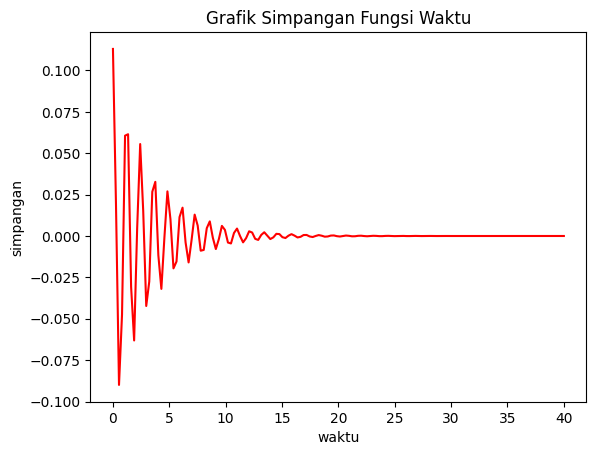

In [393]:
# 8. Membuat Grafik Getaran Teredam
def f(t):
   return x0*((math.e)**(-(δrata3*2*(math.pi)*fn3*t)))*np.cos(2*(math.pi)*fn3*t)

t = np.linspace(0, 40, 150)

plt.plot(t, f(t), color='red')
plt.xlabel('waktu')
plt.ylabel('simpangan')
plt.title('Grafik Simpangan Fungsi Waktu')
plt.show()

#### 2. 0.166 kg

In [394]:
file_path = os.path.join(path, file_name)
data = pd.read_excel(file_path, sheet_name=sheet4)
data

,Ke-,x0 (m),x1 (m),x2 (m),x3 (m),x4 (m),x5 (m),Waktu
0,1,0.12,0.118,0.115,0.1160,0.113,0.1110,2.113
1,2,0.12,0.119,0.118,0.1150,0.114,0.1100,2.154
2,3,0.12,0.117,0.117,0.1163,0.112,0.1117,2.147
3,Rerata,0.12,0.118,0.116,0.1150,0.113,0.1100,2.138


In [395]:
# Ambil nilai x0-x5 dari kolom yang sesuai
x0 = data.loc[data['Ke-'] == 'Rerata', 'x0 (m)'].values[0]
x1 = data.loc[data['Ke-'] == 'Rerata', 'x1 (m)'].values[0]
x2 = data.loc[data['Ke-'] == 'Rerata', 'x2 (m)'].values[0]
x3 = data.loc[data['Ke-'] == 'Rerata', 'x3 (m)'].values[0]
x4 = data.loc[data['Ke-'] == 'Rerata', 'x4 (m)'].values[0]
x5 = data.loc[data['Ke-'] == 'Rerata', 'x5 (m)'].values[0]

In [396]:
# 0. Mengambil nilai x0-x5 dari kolom "Rerata"
x_values = data.loc[data['Ke-'] == 'Rerata', 'x0 (m)': 'x5 (m)'].values[0]

# 1. Menghitung rasio redaman getaran (δ) menggunakan iterasi
δ = []
for i in range(len(x_values) - 1):
    δ_i = (math.log(x_values[i] / x_values[i+1])) / (((4 * ((math.pi) ** 2)) + (math.log(x_values[i] / x_values[i+1]) ** 2))) ** 0.5
    δ.append(δ_i)

# Menampilkan hasil rasio redaman getaran (δ)
for i in range(len(δ)):
    print(f'Hasil δ{i} = {δ[i]}')

Hasil δ0 = 0.0026749263892726807
Hasil δ1 = 0.0027206534993536795
Hasil δ2 = 0.0013779721749127667
Hasil δ3 = 0.0027922527188696173
Hasil δ4 = 0.004282414869910037


In [397]:
# 2. Menghitung rasio redaman getaran rata-rata (δrata)
δrata4 = sum(δ) / len(δ)
print('δrata =', δrata4)

δrata = 0.002769643930463756


In [398]:
# 3. Menghitung Frekuensi Natural
n = 5 # n adalah banyak getaran
t = data.loc[data['Ke-'] == 'Rerata', 'Waktu'].values[0] # t adalah waktu yang diperlukan sistem untuk n getaran

fn4 = n/t
print('fn = ', fn4)

fn =  2.3386342376052385


In [399]:
# 4. Menghitung Frekuensi Sistem Teredam
fd4 = fn4*((1-(δrata4**2))**0.5)
print('fd = ', fd4)

fd =  2.3386252678411923


In [400]:
# 5. Menghitung Konstanta Pegas Sistem
k4 = m2*((2*(math.pi)*fn4)**2)
print('k = ', k4)

k =  35.8420161910678


In [401]:
# 6. Menghitung Koefisien Redaman Kritis
cc4 = (4*m2*k4)**0.5
print('cc = ', cc4)

cc =  4.878431997155338


In [402]:
# 7. Menghitung Koefisien Redaman Aktual
ca4 = cc4*δrata4
print('ca = ', ca4)

ca =  0.013511519571101461


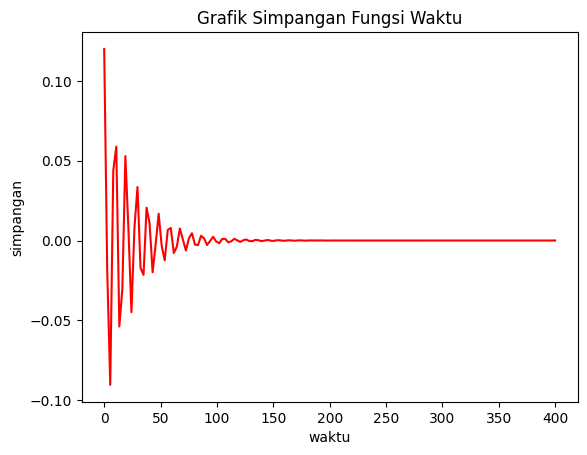

In [403]:
# 8. Membuat Grafik Getaran Teredam
def f(t):
   return x0*((math.e)**(-(δrata4*2*(math.pi)*fn4*t)))*np.cos(2*(math.pi)*fn4*t)

t = np.linspace(0, 400, 150)

plt.plot(t, f(t), color='red')
plt.xlabel('waktu')
plt.ylabel('simpangan')
plt.title('Grafik Simpangan Fungsi Waktu')
plt.show()

In [404]:
# Membuat DataFrame tabel
hasil_perhitungan_air = pd.DataFrame({
    'δrata': [δrata3, δrata4],
    'fn': [fn3, fn4],
    'fd': [fd3, fd4],
    'k': [k3, k4],
    'cc': [cc3, cc4],
    'ca': [ca3, ca4]
})

# Menampilkan tabel hasil perhitungan
hasil_perhitungan_air

,δrata,fn,fd,k,cc,ca
0,0.010204,4.545455,4.545218,84.829658,5.940466,0.060614
1,0.002770,2.338634,2.338625,35.842016,4.878432,0.013512
